## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# Combine the data into a single dataset

data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [4]:
# Made groups to organize information so I can make the graphs
Group = data[["Mouse ID", "Drug Regimen"]]
Drugs = Group["Drug Regimen"].value_counts()

Drugs_df = pd.DataFrame(Drugs).reset_index()
Drugs_df = Drugs_df.rename(columns={"index":"Drug Name", "Drug Regimen":"Number of treatments"})
Drugs_df

,Drug Name,Number of treatments
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


## Bar plots

Text(0, 0.5, 'Number of Treatments')

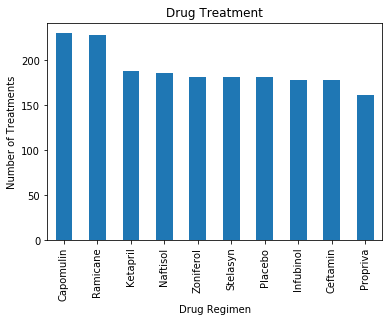

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
panda_plt = Drugs.plot(kind="bar", title="Drug Treatment")
panda_plt.set_xlabel("Drug Regimen")
panda_plt.set_ylabel("Number of Treatments")

Text(0, 0.5, 'Number of Treatments')

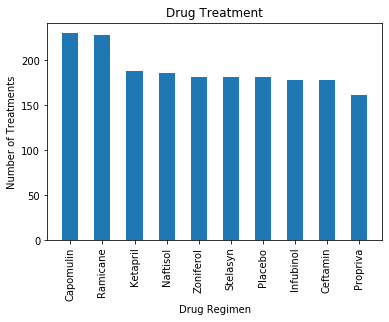

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(Drugs_df["Drug Name"], Drugs_df["Number of treatments"], width=0.5)
plt.xticks(rotation=90)
plt.title("Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")

## Pie plots

In [7]:
Sex = data["Sex"]
Sex_count = Sex.value_counts()
print(Sex_count)

Male      958
Female    935
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Male and Female Distribution')

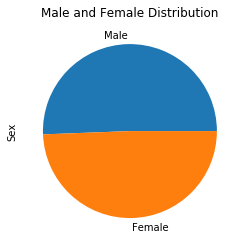

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_count.plot(kind="pie")
plt.title("Male and Female Distribution")


Text(0.5, 1.0, 'Male and Female Distribution')

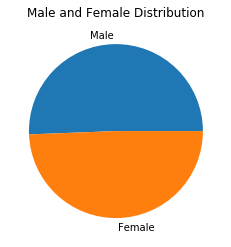

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
l = ("Male","Female")
plt.pie(Sex_count, labels=l)
plt.title("Male and Female Distribution")

## Quartiles, outliers and boxplots

In [10]:
i = ['Placebo','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

data_Q = data[["Mouse ID","Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]
p = data_Q.set_index("Drug Regimen")
pd = p.drop(i, axis=0)
pd = pd.reset_index("Drug Regimen")
# pd = pd.sort_values(by="Drug Regimen",ascending=True)
pd.head()


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729


In [11]:
#Filter for the last day of Timepoint
Time_end = pd[pd.Timepoint==45]
Time_end.sort_values("Drug Regimen")
Time_end = Time_end.rename(columns={"Drug Regimen":"Drug",
                                   "Tumor Volume (mm3)":"Tumor"})
Time_end.head()

,Drug,Mouse ID,Timepoint,Tumor
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472


In [12]:
#Capomulin
Camp = Time_end.loc[Time_end.Drug == "Capomulin", "Tumor"]
Camp.describe()

count    21.000000
mean     36.236114
std       5.608969
min      23.343598
25%      32.377357
50%      37.311846
75%      40.159220
max      47.685963
Name: Tumor, dtype: float64

In [13]:
#Ramicane
Ram = Time_end.loc[Time_end.Drug == "Ramicane", "Tumor"]
Ram.describe()

count    20.000000
mean     34.955595
std       5.486439
min      22.050126
25%      30.981175
50%      34.848627
75%      38.508305
max      45.220869
Name: Tumor, dtype: float64

In [14]:
#Infubinol
Infu = Time_end.loc[Time_end.Drug == "Infubinol", "Tumor"]
Infu.describe()

count     9.000000
mean     65.755562
std       3.433282
min      60.918767
25%      62.754451
50%      66.083066
75%      67.685569
max      72.226731
Name: Tumor, dtype: float64

In [15]:
#Ceftamin
Ceft = Time_end.loc[Time_end.Drug == "Ceftamin", "Tumor"]
Ceft.describe()

count    13.000000
mean     64.132421
std       3.253497
min      59.741901
25%      61.433892
50%      64.299830
75%      67.527482
max      68.923185
Name: Tumor, dtype: float64

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
quartiles_Capo = Camp.quantile([.25,.5,.75])
lowerq = quartiles_Capo[0.25]
upperq = quartiles_Capo[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles_Capo[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
#Ramicane
quartiles_Ram = Ram.quantile([.25,.5,.75])
lowerq = quartiles_Ram[0.25]
upperq = quartiles_Ram[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles_Ram[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [18]:
#Infubinol
quartiles_Infu = Infu.quantile([.25,.5,.75])
lowerq = quartiles_Infu[0.25]
upperq = quartiles_Infu[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles_Infu[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [19]:
#Ceftamin
quartiles_Ceft = Ceft.quantile([.25,.5,.75])
lowerq = quartiles_Ceft[0.25]
upperq = quartiles_Ceft[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles_Ceft[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


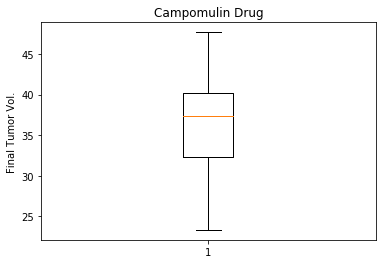

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Campomulin Drug')
ax1.set_ylabel('Final Tumor Vol.')
ax1.boxplot(Camp)
plt.show()

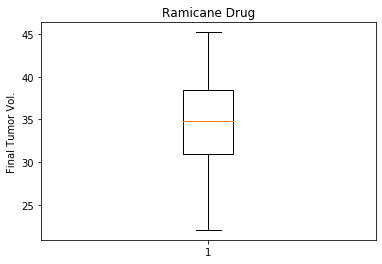

In [21]:
#Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Vol.')
ax1.boxplot(Ram)
plt.show()

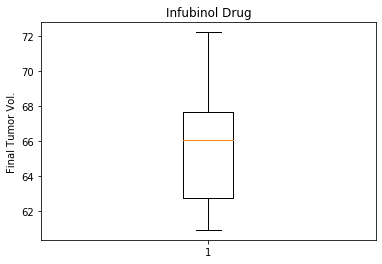

In [22]:
#Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Vol.')
ax1.boxplot(Infu)
plt.show()

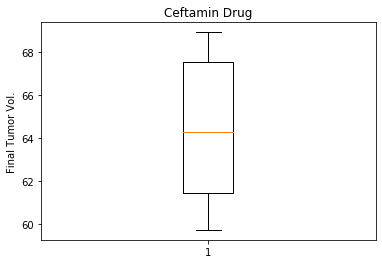

In [23]:
# Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Vol.')
ax1.boxplot(Ceft)
plt.show()

## Line and scatter plots

In [24]:
# Grouping categories and filtering for Capomulin
Capo_D = data[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"]]
Capo_data = Capo_D.rename(columns={"Drug Regimen":"Drug",
                                   "Tumor Volume (mm3)":"Tumor",
                                   "Weight (g)":"Weight"
                                  })
Capo_Line = Capo_data.loc[Capo_data.Drug=="Capomulin"]
Capo_Line.tail()

,Mouse ID,Drug,Timepoint,Tumor,Weight
440,i557,Capomulin,45,47.685963,24
1452,r157,Capomulin,0,45.000000,25
1453,r157,Capomulin,5,45.597064,25
1454,r157,Capomulin,10,46.059608,25
1455,r157,Capomulin,15,46.539206,25


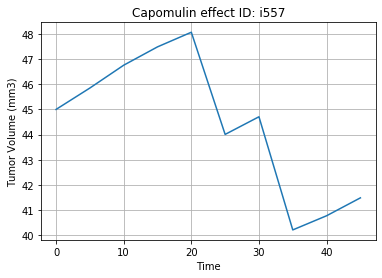

In [25]:
M = Capo_Line.loc[Capo_Line["Mouse ID"] == "l509"].head(10)
y_tumor = M["Tumor"].to_list()
time = np.arange(0,50,5)

plt.plot(time, y_tumor)
plt.title("Capomulin effect ID: i557")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Line = Capo_Line[["Tumor","Timepoint"]]
Line

Tumor_List = []
   
for i in range(0, 50, 5):
    a = Line[Line.Timepoint==i].mean()
    Tumor_List.append(a["Tumor"])

time = np.arange(0,50,5)



(36, 46)

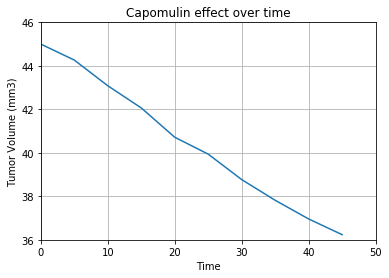

In [27]:
#Graph of Capomulin of all the mice tested

plt.plot(time, Tumor_List)
plt.title("Capomulin effect over time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(0,50)
plt.ylim(36,46)

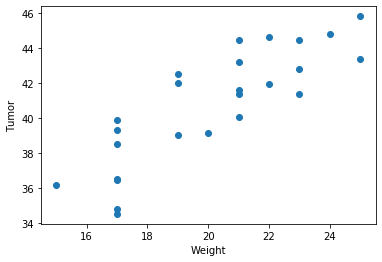

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter = Capo_Line[["Mouse ID", "Weight","Tumor"]]
Group_Avg = scatter.groupby("Mouse ID").mean()
x_value = Group_Avg["Weight"]
y_value = Group_Avg["Tumor"]
plt.scatter(x_value, y_value)
plt.xlabel("Weight")
plt.ylabel("Tumor")
plt.show()

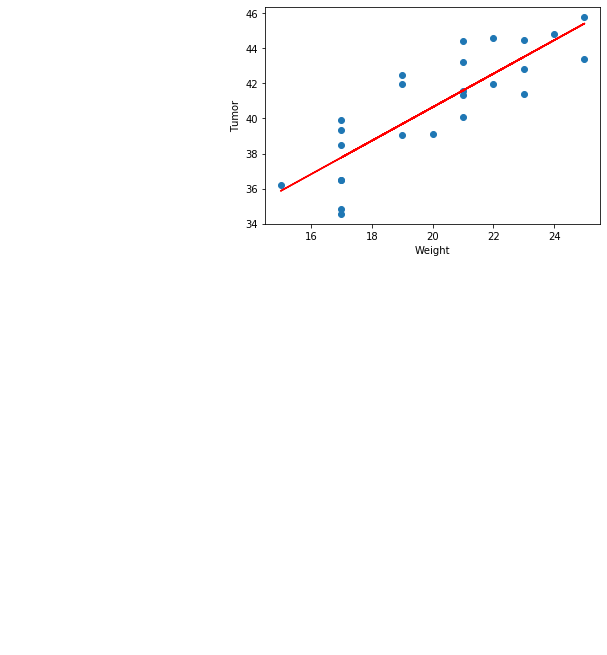

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor")
plt.show()